# Modelo para un cultivar

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [79]:
from sklearn.metrics import r2_score, mean_squared_error

In [80]:
df = pd.read_csv(r'C:\Users\mpj_0\Documents\Diplomado IA\Modulo_3\Proyecto_3\NAnderson2020MendeleyMangoNIRData.csv')

In [81]:
df.describe()

,Season,Pop,DM,285,288,291,294,297,300,303,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
count,11691.000000,11691.000000,11691.000000,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,...,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0,11691.0
mean,2.337696,49.379608,16.282835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.068196,33.796239,2.459531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1.000000,9.464606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,14.000000,14.332756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,52.000000,16.301700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,76.000000,18.112985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000000,112.000000,24.577150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
df['Cultivar'].unique()

array(['Caly', 'KP', 'HG', 'Keitt', 'R2E2', '1243', 'LadyG', '1201',
       '4069', 'LadyJ'], dtype=object)

## limpiar data set

In [83]:
# eliminar columnas que no brindan informacion

valores_unicos_n = df.nunique()
columnas_sn_info = valores_unicos_n[valores_unicos_n == 1].index.to_list()
columnas_sn_info

['285',
 '288',
 '291',
 '294',
 '297',
 '300',
 '303',
 '306',
 '1152',
 '1155',
 '1158',
 '1161',
 '1164',
 '1167',
 '1170',
 '1173',
 '1176',
 '1179',
 '1182',
 '1185',
 '1188',
 '1191',
 '1194',
 '1197',
 '1200']

In [84]:
df_clean = df.drop(columnas_sn_info, axis=1)

In [85]:
df_clean.describe()

,Season,Pop,DM,309,312,315,318,321,324,327,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
count,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,...,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000,11691.000000
mean,2.337696,49.379608,16.282835,-0.121369,-0.122153,-0.122508,-0.122760,-0.123574,-0.124780,-0.125658,...,-0.323211,-0.294027,-0.255276,-0.200071,-0.134853,-0.035276,0.058209,0.137525,0.171213,0.182458
std,1.068196,33.796239,2.459531,0.177218,0.178044,0.178374,0.178914,0.180361,0.182574,0.184599,...,0.056236,0.068977,0.089079,0.120243,0.162074,0.235316,0.294900,0.353032,0.370885,0.373042
min,1.000000,1.000000,9.464606,-0.610657,-0.607814,-0.614915,-0.589506,-0.601815,-0.618811,-0.707419,...,-0.553501,-0.514751,-0.545750,-0.509488,-0.482428,-0.443344,-0.414142,-0.434827,-0.458881,-0.465784
25%,1.000000,14.000000,14.332756,-0.331782,-0.335830,-0.340406,-0.340728,-0.341510,-0.342603,-0.345229,...,-0.365899,-0.350053,-0.330336,-0.306436,-0.279341,-0.247373,-0.215033,-0.178159,-0.143085,-0.109969
50%,3.000000,52.000000,16.301700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.325182,-0.295433,-0.255710,-0.199960,-0.134800,-0.035392,0.048089,0.094603,0.084111,0.000000
75%,3.000000,76.000000,18.112985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.284981,-0.246765,-0.195338,-0.119508,-0.035183,0.099178,0.229992,0.345084,0.398310,0.420975
max,4.000000,112.000000,24.577150,0.148020,0.039739,0.006018,0.043728,0.034238,0.036741,0.103322,...,-0.043672,0.232951,0.576403,0.816770,1.554703,1.924093,1.875707,1.881044,1.837032,2.125556


## seleccionar la clase con la que se va a trabajar

In [86]:

df_clean['Cultivar'].unique()

array(['Caly', 'KP', 'HG', 'Keitt', 'R2E2', '1243', 'LadyG', '1201',
       '4069', 'LadyJ'], dtype=object)

In [87]:
df_clean = df_clean[df_clean['Cultivar']== 'Caly']

## subconjuntop para evaluacion 

In [88]:
df_clean['Set'].unique()

array(['Cal', 'Tuning', 'Val Ext'], dtype=object)

In [89]:
df_test= df_clean[df_clean['Set'] == 'Val Ext']
df_cal= df_clean[df_clean['Set'] != 'Val Ext']

In [90]:
df_cal['Set'].unique()

array(['Cal', 'Tuning'], dtype=object)

In [91]:
df_cal.head()

,Set,Season,Region,Date,Type,Cultivar,Pop,Temp,DM,309,...,1122,1125,1128,1131,1134,1137,1140,1143,1146,1149
0,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,-0.478784,...,-0.435326,-0.432677,-0.327782,-0.429858,-0.381867,-0.338903,-0.332650,-0.267678,-0.271822,-0.222478
1,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.792506,-0.527173,...,-0.425621,-0.360318,-0.433971,-0.331219,-0.347740,-0.338237,-0.286042,-0.269070,-0.228549,-0.230635
2,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,-0.501680,...,-0.432784,-0.428193,-0.427225,-0.441603,-0.397718,-0.389544,-0.406758,-0.395734,-0.381844,-0.383979
3,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.070979,-0.455363,...,-0.438664,-0.443749,-0.415500,-0.407620,-0.424088,-0.387267,-0.387440,-0.394388,-0.403848,-0.388985
4,Cal,1,NT,2/10/2015,Hard Green,Caly,2,Mid,16.394013,-0.436971,...,-0.436217,-0.384951,-0.381970,-0.396246,-0.366629,-0.331301,-0.367609,-0.316976,-0.278354,-0.254439


In [92]:
# variables de interes / divicion de datos
y_test = df_test['DM']
y_cal = df_cal['DM']

X_cal = df_cal.iloc[:,9:]
X_test = df_test.iloc[:,9:]


In [93]:
X_test.shape

(463, 281)

In [120]:
PCR_Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=9)),
    ('regresion', LinearRegression())
])
MLR_Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regresion', LinearRegression())
])
PLS_Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regresion', PLSRegression())
])

In [124]:
# ETRENANDO
MLR_Pipeline.fit(X_cal,y_cal)
PCR_Pipeline.fit(X_cal,y_cal)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=9)),
                ('regresion', LinearRegression())])

In [101]:
# entrenamiento

In [102]:
# metrica regresion linael multiple
pred_mlr = MLR_Pipeline.predict(X_test)
print(r2_score(y_test,pred_mlr))
print(np.sqrt(mean_squared_error(y_test,pred_mlr)))

0.8813481552540061
0.7522801207304778


In [104]:
pred_pcr = PCR_Pipeline.predict(X_test)
print(r2_score(y_test,pred_pcr))
print(np.sqrt(mean_squared_error(y_test,pred_pcr)))

0.39823826734987966
1.6941607717531548


In [117]:
pca = PCR_Pipeline.named_steps['pca']
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)
cumsum = explained_variance.cumsum()


,0
0,0.548157
1,0.767077
2,0.846339
3,0.911255
4,0.936010
5,0.950819
6,0.958338
7,0.964557
8,0.968419


<Axes: >

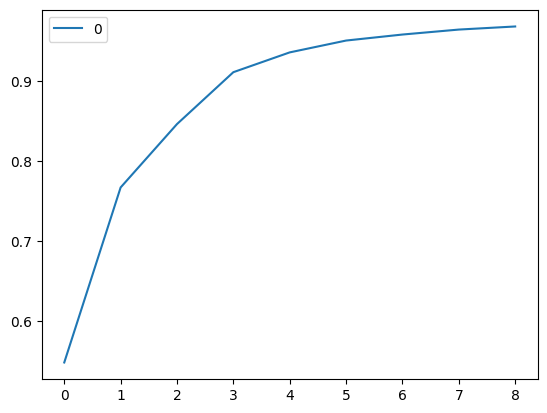

In [115]:
# grafica
cumsum.plot()

In [109]:
# Busqueda por regilla
from sklearn.model_selection import GridSearchCV, KFold

pc_params = {
    'pca__n_components': np.arange(1,280)
}

cv =  KFold(n_splits=10,shuffle=True)
pc_grid = GridSearchCV(PCR_Pipeline,pc_params,cv=cv,scoring='neg_mean_squared_error')

# entrenar
pc_grid.fit(X_cal,y_cal)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=9)),
                                       ('regresion', LinearRegression())]),
             param_grid={'pca__n_components': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46...
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279])},
             scoring='neg_mean_squared_error')

In [110]:
# preguntar mejores parametros
pc_grid.best_params_['pca__n_components']

np.int64(247)

In [122]:
# Busqueda por pls

pc_params = {
    'regresion__n_components': [32,64,100,150,200,250,280]
}

cv =  KFold(n_splits=10,shuffle=True)
pc_grid = GridSearchCV(PLS_Pipeline,pc_params,cv=cv,scoring='neg_mean_squared_error')

# entrenar
pc_grid.fit(X_cal,y_cal)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regresion', PLSRegression())]),
             param_grid={'regresion__n_components': [32, 64, 100, 150, 200, 250,
                                                     280]},
             scoring='neg_mean_squared_error')

In [123]:
pc_grid.best_params_['regresion__n_components']

100

In [125]:
PLS_Pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regresion', PLSRegression(n_components=100))
])
PLS_Pipeline.fit(X_cal,y_cal)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regresion', PLSRegression(n_components=100))])

In [126]:
# metrica
pred_pls = PLS_Pipeline.predict(X_test)
print(r2_score(y_test,pred_pls))
print(np.sqrt(mean_squared_error(y_test,pred_pls)))

0.8875262489324023
0.7324330413376569
